### Importación de datos



In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [18]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


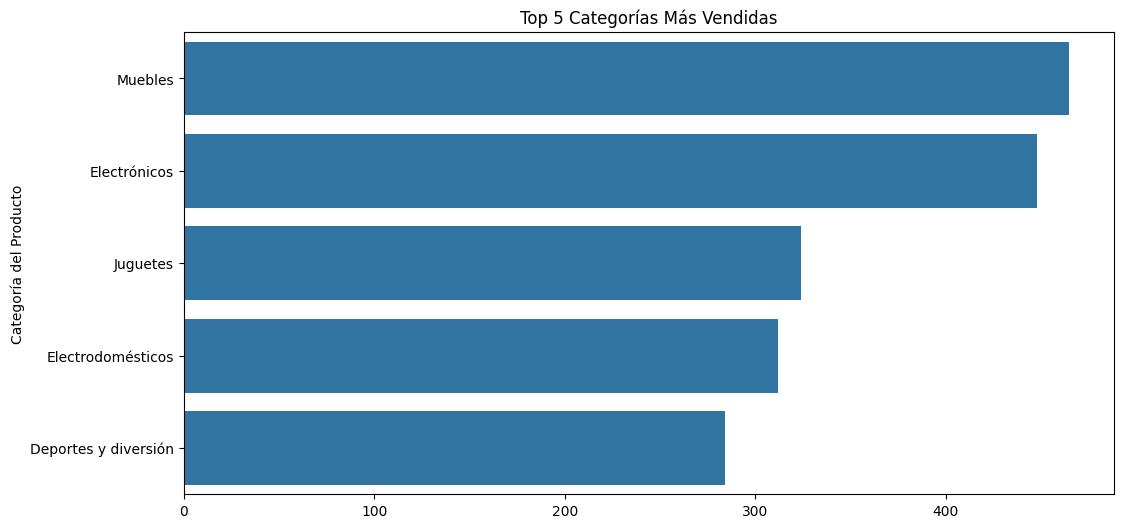

In [17]:
# Gráfico de ventas por categoría
plt.figure(figsize=(12,6))
sns.barplot(x=categorias_top.values, y=categorias_top.index)
plt.title('Top 5 Categorías Más Vendidas')
plt.show()

In [16]:
# Calculate the top 5 categories
categorias_top = tienda['Categoría del Producto'].value_counts().nlargest(5)

#1. Análisis de facturación



In [20]:
# Esto funciona para CUALQUIER dataset del challenge
def analisis_rapido(df, nombre_tienda):
    print(f"\n🔍 ANÁLISIS {nombre_tienda}")
    print(f"Registros: {len(df)}")

    # KPIs automáticos basados en columnas comunes
    if 'Precio' in df.columns:
        print(f"Ventas totales: ${df['Precio'].sum():,}")

    if 'Categoría del Producto' in df.columns:
        cat_top = df['Categoría del Producto'].value_counts().head(3)
        print("Top categorías:", cat_top.to_dict())

    if 'Lugar de Compra' in df.columns:
        ciudad_top = df['Lugar de Compra'].value_counts().head(3)
        print("Top ciudades:", ciudad_top.to_dict())

    if 'Método de pago' in df.columns:
        pago_top = df['Método de pago'].value_counts().head(3)
        print("Métodos pago:", pago_top.to_dict())

# Ejecutar para todas las tiendas
for i, df in enumerate([tienda, tienda2, tienda3, tienda4], 1):
    analisis_rapido(df, f"TIENDA {i}")


🔍 ANÁLISIS TIENDA 1
Registros: 2359
Ventas totales: $1,150,880,400.0
Top categorías: {'Muebles': 465, 'Electrónicos': 448, 'Juguetes': 324}
Top ciudades: {'Bogotá': 984, 'Medellín': 563, 'Cali': 283}
Métodos pago: {'Tarjeta de crédito': 1704, 'Nequi': 483, 'Cupón': 137}

🔍 ANÁLISIS TIENDA 2
Registros: 2359
Ventas totales: $1,116,343,500.0
Top categorías: {'Muebles': 442, 'Electrónicos': 422, 'Juguetes': 313}
Top ciudades: {'Bogotá': 985, 'Medellín': 594, 'Cali': 222}
Métodos pago: {'Tarjeta de crédito': 1721, 'Nequi': 467, 'Cupón': 141}

🔍 ANÁLISIS TIENDA 3
Registros: 2359
Ventas totales: $1,098,019,600.0
Top categorías: {'Muebles': 499, 'Electrónicos': 451, 'Juguetes': 315}
Top ciudades: {'Bogotá': 983, 'Medellín': 580, 'Cali': 248}
Métodos pago: {'Tarjeta de crédito': 1753, 'Nequi': 468, 'Cupón': 101}

🔍 ANÁLISIS TIENDA 4
Registros: 2358
Ventas totales: $1,038,375,700.0
Top categorías: {'Muebles': 480, 'Electrónicos': 451, 'Juguetes': 338}
Top ciudades: {'Bogotá': 991, 'Medellín': 5

# 2. Ventas por categoría

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda